ASSIGNMENT-06 SETAQ1
Write a python program to implement k-means algorithm to build prediction model using given dataset.

In [33]:
#importing libraries
import numpy as np
import matplotlib.pyplot as matp
import pandas as pd

#importing dataset

In [34]:
dataset=pd.read_csv("CC GENERAL.csv")
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Extracting independent variables

In [35]:
x=dataset.iloc[:,[1,3]].values
print(x)

[[  40.900749   95.4     ]
 [3202.467416    0.      ]
 [2495.148862  773.17    ]
 ...
 [  23.398673  144.4     ]
 [  13.457564    0.      ]
 [ 372.708075 1093.25    ]]


#finding optimal number of customers using the elbow method

In [36]:
from sklearn.cluster import KMeans
wcss_list= []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    

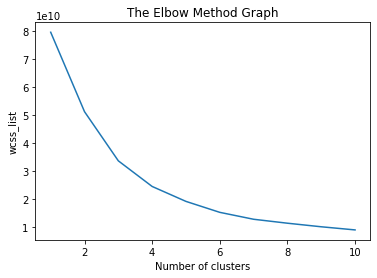

In [37]:
    matp.plot(range(1,11),wcss_list)
    matp.title('The Elbow Method Graph')
    matp.xlabel('Number of clusters')
    matp.ylabel('wcss_list')
    matp.show()

#Training the Kmeans model on dataset

In [38]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state= 42)
y_pred= kmeans.fit_predict(x)

In [39]:
print(y_pred)

[0 3 3 ... 0 0 0]


#Visualization of clusters

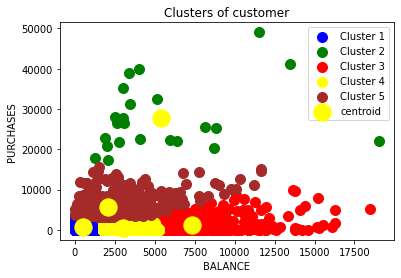

In [42]:
matp.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='blue',label='Cluster 1')
matp.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='green',label='Cluster 2')
matp.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='red',label='Cluster 3')
matp.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='yellow',label='Cluster 4')
matp.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='brown',label='Cluster 5')
matp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
matp.title('Clusters of customer')
matp.xlabel('BALANCE')
matp.ylabel('PURCHASES')
matp.legend()
matp.show()